# Qiskit VQE Tutorial
Full tutorial using Qiskit VQE class following
https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/algorithms/02_vqe_advanced_options.ipynb

In [17]:
import numpy as np
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import NELDER_MEAD
from qiskit_nature.circuit.library.ansatzes import UCC
from qiskit_nature.converters.second_quantization.qubit_converter import QubitConverter
from qiskit_nature.mappers.second_quantization import JordanWignerMapper
from qiskit.utils import algorithm_globals
from qiskit.primitives import Estimator
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal
import datetime

from qiskit import QuantumCircuit

from src.hamiltonian.FermionicHamiltonian import FermionicHamiltonian
from src.molecule.BeH2 import BeH2

In [18]:
# Hamiltonian operator creation
H2_op = SparsePauliOp.from_list(
    [
        ("IIII", -1.052373245772859),
        ("IZII", 0.39793742484318045),
        ("ZIII", -0.39793742484318045),
        ("ZZII", -0.01128010425623538),
        ("XXII", 0.18093119978423156),
    ]
)

In [19]:
H2_op.num_qubits

4

In [20]:
molecule = BeH2(14, 6)

In [21]:
hamiltonian = FermionicHamiltonian(molecule.num_orbitals, molecule=molecule)
op = hamiltonian.get_hamiltonian()

In [22]:
print(len(op))

24598


In [23]:
# create estimator, optimizer, converter, ansatz
estimator = Estimator()
# optimizer definition
optimizer = NELDER_MEAD(maxiter=50, maxfev=50)
# use UCC Ansatz
converter = QubitConverter(mapper=JordanWignerMapper(), two_qubit_reduction=True)
#ansatz = UCC(excitations='st')

In [24]:
ucc_ansatz = UCC(qubit_converter=converter, num_spin_orbitals=14, num_particles=(0,6), excitations='sd', alpha_spin=True, beta_spin=True, max_spin_excitation=1, generalized=True, preserve_spin=True, reps=5)

In [25]:
ucc_ansatz.num_qubits
# has to be equal to the ones of the hamiltonian

14

In [26]:
ucc_ansatz_h2 = UCC(qubit_converter=converter, num_spin_orbitals=4, num_particles=(0,2), excitations='sd', alpha_spin=True, beta_spin=True, max_spin_excitation=1, generalized=True, preserve_spin=True, reps=5)

In [27]:
print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
algorithm_globals.random_seed = 50

# use ansatz TwoLocal
#ansatz2 = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
counts = []
values = []

Optimizer: NELDER_MEAD        

In [28]:
def store_intermediate_result(eval_count, parameters, mean, std):
    time = datetime.datetime.now()
    print(f"Iteration done at {time}")
    counts.append(eval_count)
    values.append(mean)

In [29]:
# TwoLocal Ansatz
# ansatz = TwoLocal(rotation_blocks="ry", entanglement_blocks="cz")
optimizer.setting

"Optimizer: NELDER_MEAD\n-- method: nelder-mead\n-- bounds_support_level: 1\n-- gradient_support_level: 1\n-- initial_point_support_level: 3\n-- options: {'maxiter': 50, 'maxfev': 50, 'disp': False, 'xatol': 0.0001, 'adaptive': False}\n-- max_evals_grouped: 1\n-- kwargs: {'tol': None}\n"

In [30]:
# Use VQE with estimator, ansatz, optimizer
vqe = VQE(estimator, ucc_ansatz, optimizer, callback=store_intermediate_result)
# invoke computation on the operator
time = datetime.datetime.now()
print(f"Starting calculation at: {time}")
result = vqe.compute_minimum_eigenvalue(operator=op)
time = datetime.datetime.now()
print(f"Ended calculation at: {time}")


converge_counts = np.asarray(counts)
converge_vals = np.asarray(values)

print("\rOptimization complete");

Starting calculation at: 2023-04-25 18:24:36.322474
Iteration done at 2023-04-25 18:27:15.007963
Iteration done at 2023-04-25 18:30:13.852339
Iteration done at 2023-04-25 18:33:23.234319
Iteration done at 2023-04-25 18:36:33.777804
Iteration done at 2023-04-25 18:40:08.282280
Iteration done at 2023-04-25 18:43:40.810202
Iteration done at 2023-04-25 18:47:09.768215
Iteration done at 2023-04-25 18:50:33.239159
Iteration done at 2023-04-25 18:53:54.440923
Iteration done at 2023-04-25 18:57:30.231868
Iteration done at 2023-04-25 19:00:59.098400
Iteration done at 2023-04-25 19:03:47.314944
Iteration done at 2023-04-25 19:06:41.839363
Iteration done at 2023-04-25 19:09:47.325395
Iteration done at 2023-04-25 19:12:48.939832
Iteration done at 2023-04-25 19:15:44.050912
Iteration done at 2023-04-25 19:18:43.835449
Iteration done at 2023-04-25 19:21:52.930258
Iteration done at 2023-04-25 19:24:52.561427
Iteration done at 2023-04-25 19:27:49.205316
Iteration done at 2023-04-25 19:30:49.405487
Ite

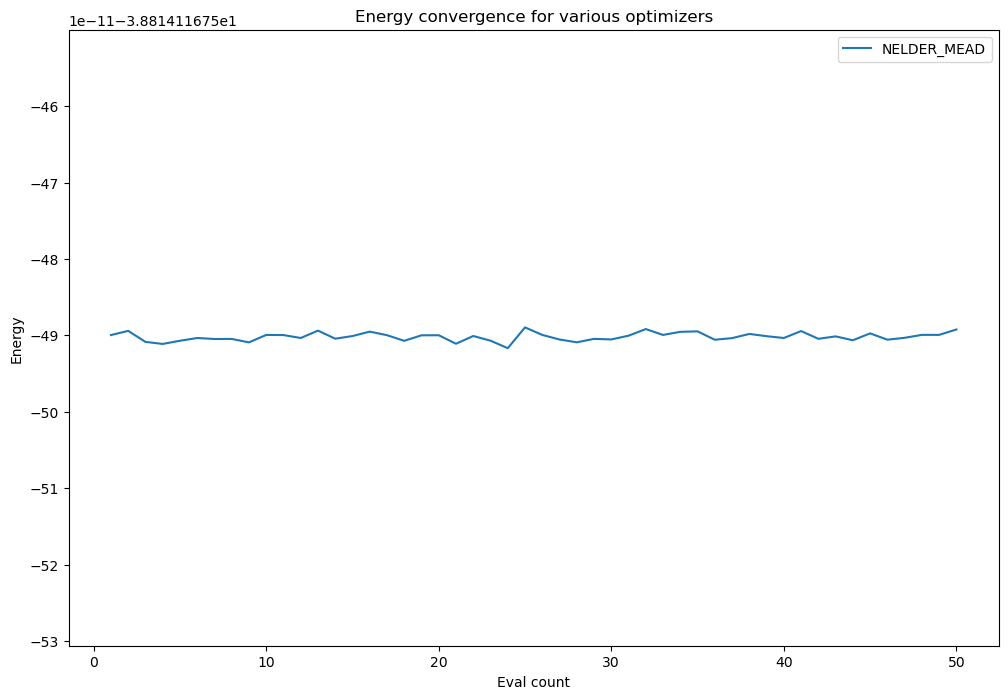

In [31]:
# Outputting the optimization process
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
pylab.plot(converge_counts, converge_vals, label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

In [34]:
# Analytic solution
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.opflow import PauliSumOp

numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=op)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

Reference value: -56.31553


In [37]:
result.eigenstate.

14